<a href="https://colab.research.google.com/github/Tee-py/colab-ml-notebooks/blob/main/AlgorithmicCryptorading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import pandas as pd

In [2]:
#Loading data
from google.colab import files
up_file = files.upload()

Saving BTCUSD=X.csv to BTCUSD=X.csv


In [3]:
BTC_USD = pd.read_csv("BTCUSD=X.csv")
BTC_USD

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-11-09,0.243000,0.199000,0.323000,0.210000,0.210000,1280800
1,2010-11-10,0.210000,0.140000,0.240000,0.240000,0.240000,611000
2,2010-11-11,0.240000,0.210000,0.240000,0.223100,0.223100,111100
3,2010-11-12,0.223100,0.223000,0.290000,0.268200,0.268200,1049400
4,2010-11-15,0.279000,0.268200,0.282800,0.268200,0.268200,233700
...,...,...,...,...,...,...,...
2605,2020-11-03,13550.448242,13325.444336,13984.976563,13950.308594,13950.308594,0
2606,2020-11-04,13950.483398,13580.480469,14218.763672,14133.715820,14133.715820,0
2607,2020-11-05,14133.736328,14102.085938,15706.402344,15579.842773,15579.842773,0
2608,2020-11-06,15579.720703,15226.841797,15903.433594,15565.875000,15565.875000,0


In [4]:
#30 day Simple moving Average
SMA_30 = pd.DataFrame()
SMA_30["Adj Close"] = BTC_USD["Adj Close"].rolling(window=30).mean()
SMA_30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2605,11781.385449
2606,11911.647005
2607,12072.790169
2608,12234.909473


In [5]:
#100 day Simple Moving Average
SMA_100 = pd.DataFrame()
SMA_100["Adj Close"] = BTC_USD["Adj Close"].rolling(window=100).mean()
SMA_100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2605,10852.604961
2606,10899.139580
2607,10960.819561
2608,11023.598135


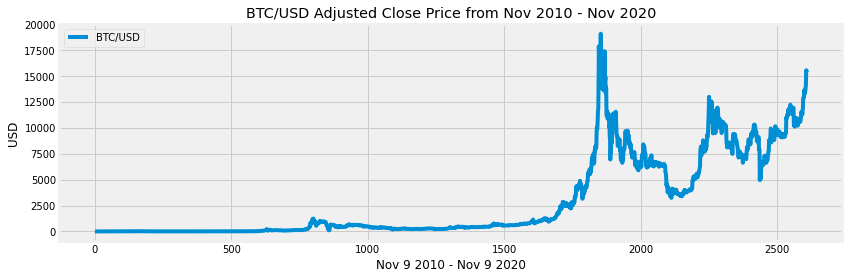

In [6]:
#visualize BTC_USD
plt.figure(figsize=(12.5, 4))
plt.plot(BTC_USD["Adj Close"], label="BTC/USD")
plt.title("BTC/USD Adjusted Close Price from Nov 2010 - Nov 2020")
plt.xlabel("Nov 9 2010 - Nov 9 2020")
plt.ylabel("USD")
plt.legend(loc="upper left")
plt.show()

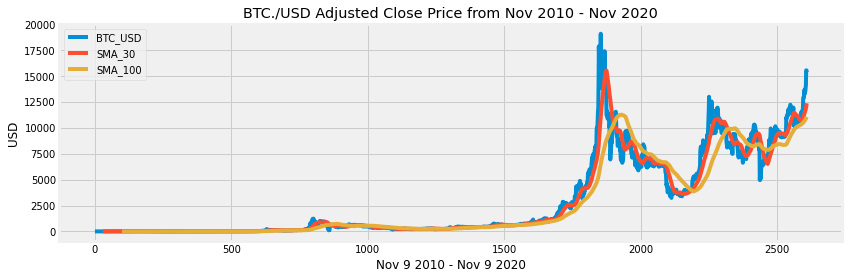

In [7]:
#Visualize BTC/USD, SMA_30, SMA_100
plt.figure(figsize=(12.5, 4))
plt.plot(BTC_USD["Adj Close"], label="BTC_USD")
plt.plot(SMA_30["Adj Close"], label="SMA_30")
plt.plot(SMA_100["Adj Close"], label="SMA_100")
plt.title("BTC./USD Adjusted Close Price from Nov 2010 - Nov 2020")
plt.xlabel("Nov 9 2010 - Nov 9 2020")
plt.ylabel("USD")
plt.legend(loc="upper left")
plt.show()

In [9]:
#New Dataset to hold all Features
dataset = pd.DataFrame()
dataset["BTC_USD"] = BTC_USD["Adj Close"]
dataset["SMA_30"] = SMA_30["Adj Close"]
dataset["SMA_100"] = SMA_100["Adj Close"]
dataset

,BTC_USD,SMA_30,SMA_100
0,0.210000,NaN,NaN
1,0.240000,NaN,NaN
2,0.223100,NaN,NaN
3,0.268200,NaN,NaN
4,0.268200,NaN,NaN
...,...,...,...
2605,13950.308594,11781.385449,10852.604961
2606,14133.715820,11911.647005,10899.139580
2607,15579.842773,12072.790169,10960.819561
2608,15565.875000,12234.909473,11023.598135


In [10]:
def buy_sell(data, pair):
  buy_prices = []
  sell_prices = []
  flag = -1
  for i in range(len(data)):
    if data["SMA_30"][i] > data["SMA_100"][i]:
      if flag != 1:
        buy_prices.append(data[pair][i])
        sell_prices.append(np.nan)
        flag = 1
      else:
        buy_prices.append(np.nan)
        sell_prices.append(np.nan)
    elif data["SMA_30"][i] < data["SMA_100"][i]:
      if flag != 0:
        buy_prices.append(np.nan)
        sell_prices.append(data[pair][i])
        flag = 0
      else:
        buy_prices.append(np.nan)
        sell_prices.append(np.nan)
    else:
      buy_prices.append(np.nan)
      sell_prices.append(np.nan)
  return (buy_prices, sell_prices)

In [11]:
buy_sell = buy_sell(dataset, "BTC_USD")
dataset["Buy Signal"] = buy_sell[0]
dataset["Sell Signal"] = buy_sell[1]

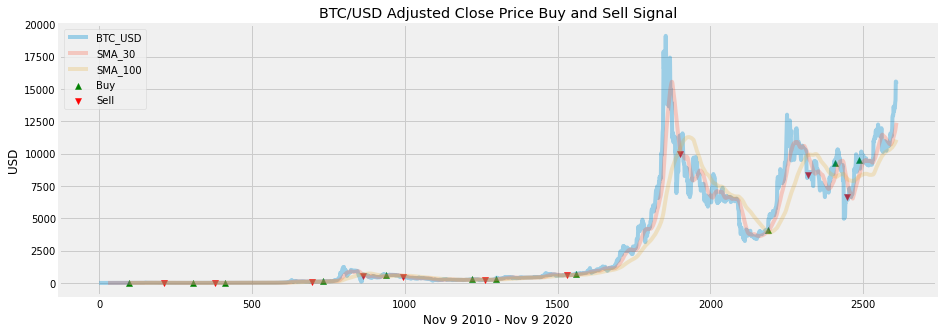

In [12]:
#Visualize Signal
plt.figure(figsize=(14, 5))
plt.plot(dataset['BTC_USD'], label="BTC_USD", alpha = 0.35)
plt.plot(dataset['SMA_30'], label="SMA_30", alpha = 0.25)
plt.plot(dataset['SMA_100'], label="SMA_100", alpha = 0.25)
plt.scatter(dataset.index, dataset["Buy Signal"], label = "Buy", marker="^", color = "green")
plt.scatter(dataset.index, dataset["Sell Signal"], label = "Sell", marker="v", color = "red")
plt.title("BTC/USD Adjusted Close Price Buy and Sell Signal")
plt.xlabel("Nov 9 2010 - Nov 9 2020")
plt.ylabel("USD")
plt.legend(loc="upper left")
plt.show()